# Submetric - Parks

A key component to fun in a neighborhood is the availabilty and quality of public zones dedicated to fun - i.e. parks. Using a combination of a datasets on parks, I will develop a metric for determining the best neighborhood for parks in Pittsburgh.

## Metric

The best neighborhood for parks depends on two factors, the number of parks in a neighborhood and the total area of parks. Each is valuable because it determines how many parks are available for use as well as how much space is available. We will multiply these two factors to generate our metric.

## Analysis

First we import pandas and import our data.

In [4]:
# import pandas
import pandas as pd
import geopandas as gp
%matplotlib inline

# import our datasets
parks = pd.read_csv("parks.csv")
parks2 = pd.read_csv("parks2.csv")

The first parks dataset includes data on the dimensions of the park.

In [14]:
parks.sample(5)

,objectid_1,objectid,acreage,sqft,final_cat,type,sector,origpkname,updatepknm,alterntnam,...,globalid,created_user,created_date,last_edited_user,last_edited_date,maintenanceresponsibility,dpw_ac,globalid_1,shape_area,shape_length
140,1342,165,1.011202,44047.771639,Neighborhood Park,NP,1,Scherer Field,Scherer Park,Scherer Field,...,207b0267-2101-4b62-aa7b-4c55ace2496e,pgh.dcp.allisot,2022-08-24T16:53:03.812000+00:00,pgh.dcp.allisot,2022-08-24T16:53:03.812000+00:00,Parks - Northern,1.011202,b19d9cdf-1898-4107-9daf-6330d3c822e8,7078.359375,348.566004
113,1315,83,1.263132,55021.795431,Neighborhood Park,NP,8,Hays Parklet,Hays Park,Hays Park,...,286d8335-f1a8-402b-969d-0ede4cfcd2cc,pgh.dcp.allisot,2022-08-24T16:53:03.812000+00:00,pgh.dcp.allisot,2022-08-24T16:53:03.812000+00:00,Parks - Eastern,1.263132,839cd20f-900c-4f06-a597-7d0556221b91,8820.171875,548.103134
136,1338,166,0.148856,6484.153953,Beautification Site,BTF,4,Sheraden Monument,Sheraden Monument,Sheraden Monument,...,8418b4f5-e453-45fb-9b9f-71b56a782739,pgh.dcp.allisot,2022-08-24T16:53:03.812000+00:00,pgh.dcp.allisot,2022-08-24T16:53:03.812000+00:00,5th Division,0.148856,70f3d4ad-4138-4026-b20b-1c3349a97fde,1041.593750,148.113149
122,1324,61,0.132588,5775.498858,Neighborhood Park,NP,4,Esplen Tot Lot,Esplen Park,Esplen Park,...,3be60947-2c73-4a72-b6d0-3461abc6e3d2,pgh.dcp.allisot,2022-08-24T16:53:03.812000+00:00,pgh.dcp.allisot,2022-08-24T16:53:03.812000+00:00,Parks - Western,0.132588,5782c937-057e-4211-8835-58b82c817eeb,927.945312,127.760399
69,1271,81,0.520989,22694.203601,Neighborhood Park,NP,15,Granville Parklet,Granville Park,Granville Park,...,eea870bf-624f-48a6-86ba-81f5b2b87dae,pgh.dcp.allisot,2022-08-24T16:53:03.812000+00:00,pgh.dcp.allisot,2022-08-24T16:53:03.812000+00:00,Parks - Schenley,0.520989,b7a4adb7-61c0-47cd-9691-24c41c158e2b,3644.503906,251.094223


Not all of the entries in this dataset are parks, and we don't need all of these columns.

In [5]:
# filter out only the entries that describe a park
parks = parks.loc[parks['final_cat'].str.contains("Park")]

# strip the columns down to just the park name and the acreage
parks = parks[['updatepknm','acreage']]

parks.sample(5)

,updatepknm,acreage
69,Granville Park,0.520989
8,Herschel Park,8.320236
171,Homewood Healthy Active Living Center,0.221227
0,August Wilson Park,0.959034
31,Tuxedo Street Skate Park,1.053451


Now that we have the acreage for each park, we need to know which neighborhood each park is in. However, the first parks dataset does not include which neighborhood each park is in. That's where the parks2 datasets comes in handy.

In [21]:
parks2.sample(5)

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
21,207590040,Beechview Monument,Monument/Memorial,5th Division,NaN,Beechview,4,19,42003192000,5,19,6,4-28,40.403645,-80.030173
179,11470988,Thomas Park,Park,Parks - Northern,https://tools.wprdc.org/images/pittsburgh/park...,Central Business District,6,1,42003020100,6,1,2,1-4,40.436498,-79.998994
25,79129285,Boundary Street Park,Park,Parks - Schenley,NaN,Central Oakland,3,4,42003040600,3,4,4,2-11,40.438528,-79.950589
35,708514774,Chartiers Park,Park,Parks - Western,NaN,Windgap,2,28,42003563000,5,28,6,1-16,40.457000,-80.074293
52,1479452830,East Liberty Blvd Strip,Traffic Island/Median,Parks - Northeast,NaN,East Liberty,9,11,42003111500,2,11,5,3-10,40.463993,-79.920028


This dataset has a few columns we don't need, so let's strip it down.

In [6]:
parks2 = parks2[['name','neighborhood']]
parks2.sample(5)

,name,neighborhood
6,Alpine Gardens Park,Central Northside
81,Garvin Park,Perry North
78,Friendship Park,Bloomfield
100,Kite Hill Park,Garfield
116,Manchester School Park,Manchester


Now we will combine the two datasets so we know which neighborhood each park is in as well as it's acreage.

In [7]:
# the park name columns need to have the same name to merge
parks = parks.rename(columns={'updatepknm':'name'})

# merges the data
parks = pd.merge(parks,parks2,how="left", on='name')
parks.sample(5)

,name,acreage,neighborhood
3,Friendship Park,1.955430,Bloomfield
20,Leolyn Park,0.455316,Carrick
10,Sheraden Park,51.036483,Sheraden
108,Mutual Park,0.345286,Sheraden
126,Cobden Street Park,0.874328,South Side Slopes


Here we visualize the size of each park:

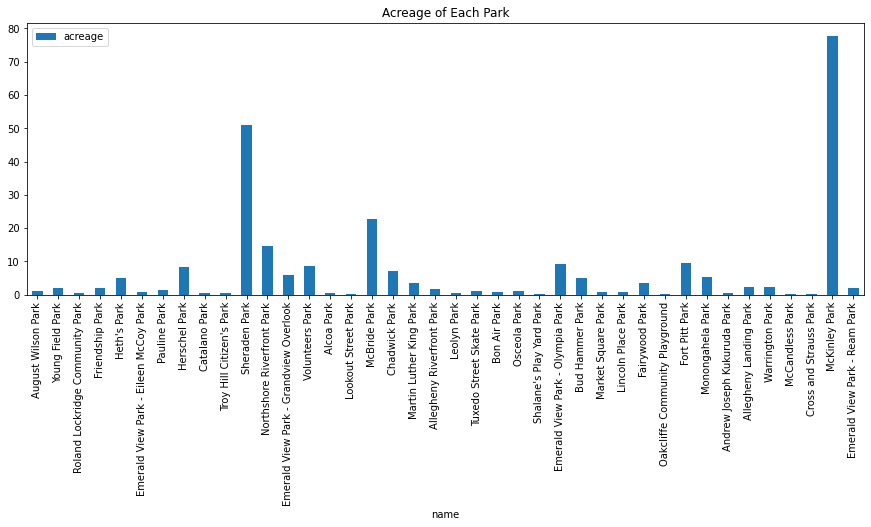

In [8]:
parks.head(40).plot.bar(x='name',title="Acreage of Each Park", figsize=(15,5))

Next we will sum up the acreage of the parks for each neighborhood.

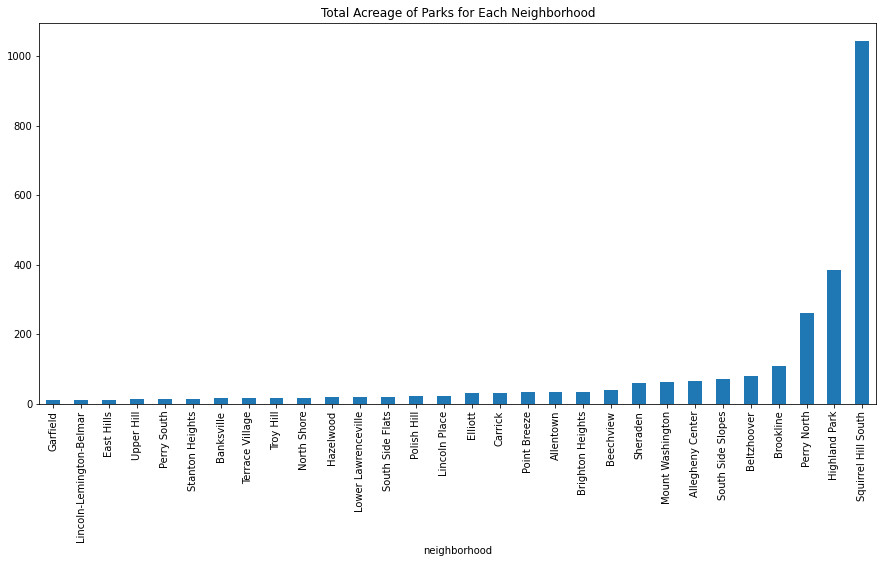

In [9]:
total_acreage = parks.groupby('neighborhood')['acreage'].sum()
total_acreage.sort_values().tail(30).plot.bar(title="Total Acreage of Parks for Each Neighborhood", figsize=(15,7))

Then we count the number of parks per neighborhood.

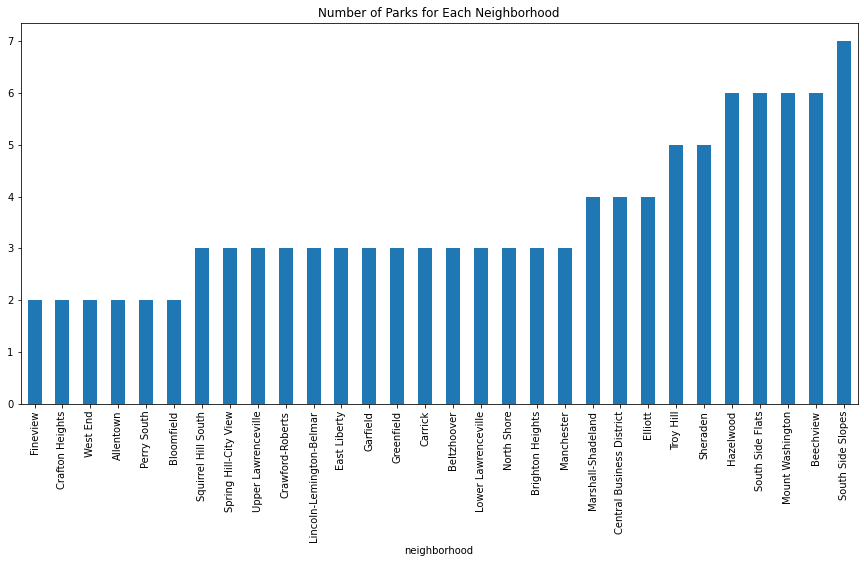

In [10]:
num_of_parks = parks.groupby('neighborhood')['name'].count()
num_of_parks.sort_values().tail(30).plot.bar(title="Number of Parks for Each Neighborhood", figsize=(15,7))

Finally, we generate our metric by multiplying these two values.

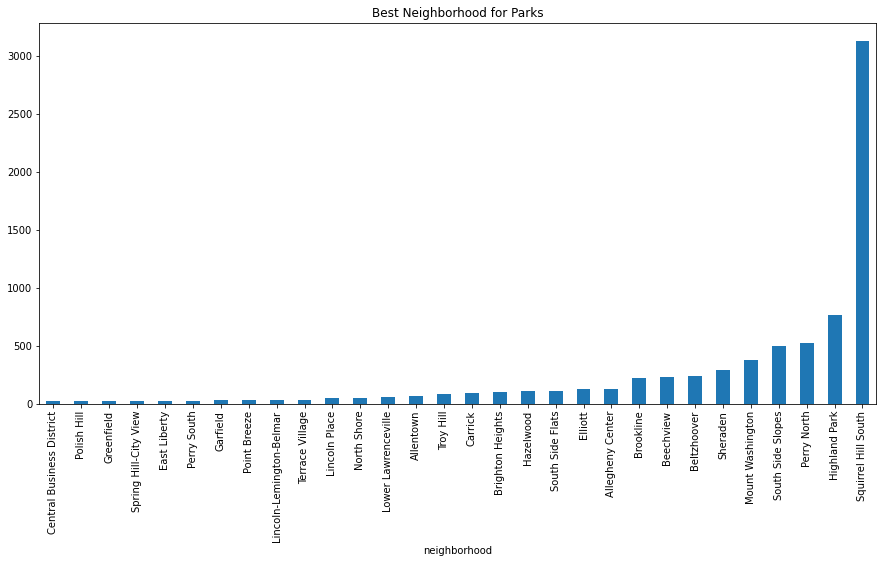

In [22]:
metric = (num_of_parks * total_acreage)
metric.sort_values().tail(30).plot.bar(title="Best Neighborhood for Parks", figsize=(15,7))

In [23]:
metric.sort_values()

neighborhood
West Oakland              0.053646
Bluff                     0.108286
Esplen                    0.132588
Westwood                  0.344124
Homewood West             0.428525
                          ...     
Mount Washington        378.294610
South Side Slopes       498.721701
Perry North             520.405507
Highland Park           766.037293
Squirrel Hill South    3126.670986
Length: 71, dtype: float64

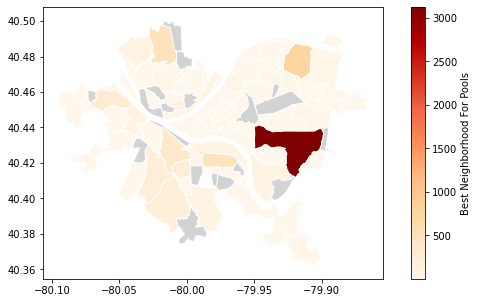

In [24]:
# Import neighborhood geometry data
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp")

# merge our metric data with the geometry
metric.name = "metric"
metric = neighborhoods.merge(metric, how='left', left_on='hood', right_on='neighborhood')

# plot a map, "metric" is the metric #
metric.plot(column="metric",
            cmap='OrRd',              
               edgecolor="white",        
               legend=True,              
               legend_kwds={'label': "Best Neighborhood For Parks"}, 
               figsize=(10, 5),         
               missing_kwds={"color": "lightgrey"} 
           )
            